In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, SparsePCA, TruncatedSVD 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

In [3]:
lidc_cnnFeatures = pd.read_csv('../data/cnn_features (3).csv',index_col=0)

In [14]:
lidc = pd.read_csv('../data/LIDC_labels.csv')

In [12]:
lidc_cnnFeatures.head()

,nodule_id,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
0,2691,0.000000,0.000000,0.000000,0.000000,0.213397,1.219989,0.000000,0.000000,0.145907,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.686270,1.748938,0.000000,0.000000,0.000000
1,2185,0.774602,1.016352,0.715805,0.239734,0.758472,1.315181,0.399833,0.083485,0.234024,...,0.002196,0.280764,0.01601,0.078014,0.049616,1.872147,1.109877,0.183929,0.334173,0.002318
2,2190,0.000000,0.000000,0.000000,0.000000,0.582075,1.415442,0.085088,0.000000,0.067842,...,0.000000,0.000000,0.00000,0.000000,0.354359,2.377559,1.842254,0.025743,0.000000,0.000000
3,990,0.001542,0.048578,0.000000,0.000000,0.622260,2.050273,0.006325,0.000000,0.111076,...,0.000000,0.000000,0.00000,0.000000,0.890688,2.450668,2.150176,0.097324,0.003312,0.000000
4,386,0.022453,0.000000,0.007815,0.000000,0.935344,1.723136,0.000000,0.000000,1.313148,...,0.000000,0.000000,0.00000,0.048206,0.792891,2.355183,2.552083,0.145568,0.000000,0.000000


In [4]:
X = lidc_cnnFeatures.drop(columns=['nodule_id']).values
pca_512 = PCA(n_components=512, random_state=4)
pca_512.fit(X)

PCA(n_components=512, random_state=4)

Text(0, 0.5, 'Cumulative Explained Variance')

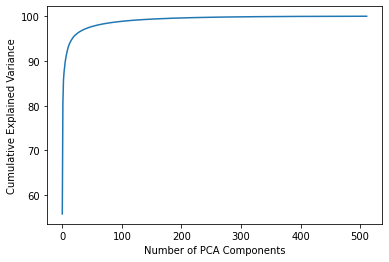

In [5]:
cum_component_variance = np.cumsum(pca_512.explained_variance_ratio_*100)
plt.plot(cum_component_variance)
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')

In [9]:
cum_component_variance[10]

93.13911874625937

In [10]:
pca_10 = PCA(n_components=10, random_state=4)
pca_10.fit(X)
X_pca = pca_10.transform(X)

In [11]:
X_embedded = TSNE(n_components=2, random_state=4).fit_transform(X)

C:\Users\tzeng1\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\tzeng1\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [61]:
malignancy = [int(lidc[lidc['noduleID'] == id]['malignancy'] > 3) for id in lidc_cnnFeatures['nodule_id']]

In [62]:
lidc_TSNE = pd.DataFrame()
lidc_TSNE['component_1'] = X_embedded[:,0]
lidc_TSNE['component_2'] = X_embedded[:,1]
lidc_TSNE['malignancy'] = malignancy

In [75]:
calcification = [int(lidc[lidc['noduleID'] == id]['calcification'] < 6) for id in lidc_cnnFeatures['nodule_id']]
lidc_TSNE['calcification'] = calcification

In [64]:
lidc_TSNE.groupby(['malignancy', 'calcification']).size()

malignancy  calcification
0           0                636
            1                261
1           0                589
            1                  2
dtype: int64

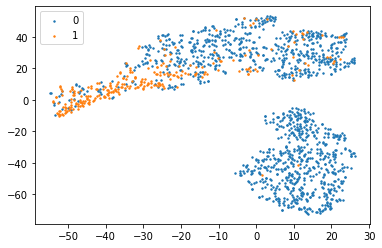

In [76]:
fig, ax = plt.subplots()
group = lidc_TSNE['calcification']
component_1 = lidc_TSNE['component_1'].to_numpy()
component_2 = lidc_TSNE['component_2'].to_numpy()
# legend = {0:'red', 1:'blue'}

for g in np.unique(group):
    idx = np.where(group == g)
    ax.scatter(component_1[idx], component_2[idx],  label = g, s = 2) #c = legend[g],
ax.legend()
plt.show()

In [104]:
spiculation = [int(lidc[lidc['noduleID'] == id]['spiculation'] > 1) for id in lidc_cnnFeatures['nodule_id']]
lidc_TSNE['spiculation'] = spiculation

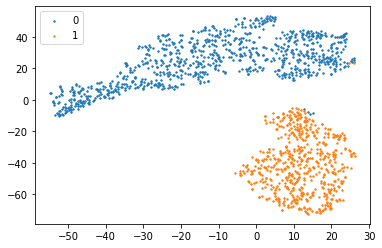

In [105]:
fig, ax = plt.subplots()
group = lidc_TSNE['malignancy']
component_1 = lidc_TSNE['component_1'].to_numpy()
component_2 = lidc_TSNE['component_2'].to_numpy()
# legend = {0:'red', 1:'blue'}

for g in np.unique(group):
    idx = np.where(group == g)
    ax.scatter(component_1[idx], component_2[idx],  label = g, s = 2) #c = legend[g],
ax.legend()
plt.show()

In [78]:
malig4 = [int(lidc[lidc['noduleID'] == id]['malignancy'] - 1) for id in lidc_cnnFeatures['nodule_id']]
lidc_TSNE['malig4'] = malig4

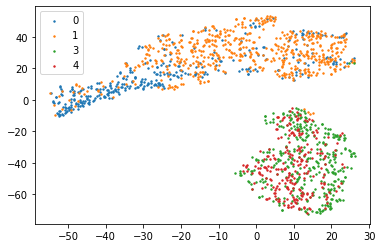

In [79]:
fig, ax = plt.subplots()
group = lidc_TSNE['malig4']
component_1 = lidc_TSNE['component_1'].to_numpy()
component_2 = lidc_TSNE['component_2'].to_numpy()
# legend = {0:'red', 1:'blue'}

for g in np.unique(group):
    idx = np.where(group == g)
    ax.scatter(component_1[idx], component_2[idx],  label = g, s = 2) #c = legend[g],
ax.legend()
plt.show()

In [137]:
temp = [int(lidc[lidc['noduleID'] == id]['spiculation'] > 1 & (lidc[lidc['noduleID'] == id]['malignancy'] < 3)) for id in lidc_cnnFeatures['nodule_id']]
lidc_TSNE['temp'] = temp

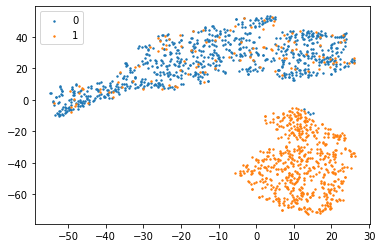

In [138]:
fig, ax = plt.subplots()
group = lidc_TSNE['temp']
component_1 = lidc_TSNE['component_1'].to_numpy()
component_2 = lidc_TSNE['component_2'].to_numpy()
# legend = {0:'red', 1:'blue'}

for g in np.unique(group):
    idx = np.where(group == g)
    ax.scatter(component_1[idx], component_2[idx],  label = g, s = 2) #c = legend[g],
ax.legend()
plt.show()

In [53]:
lobulation = [int(lidc[lidc['noduleID'] == id]['calcification'] > 5) for id in lidc_cnnFeatures['nodule_id']]
# lobulation = [int(lidc[lidc['noduleID'] == id]['malignancy'] - 1) for id in lidc_cnnFeatures['nodule_id']]

lidc_TSNE['lobulation'] = lobulation

In [54]:
lidc_TSNE.head()

,component_1,component_2,malignancy,spiculation,lobulation
0,14.891434,41.481915,0,0,1
1,1.743238,20.072273,0,0,1
2,9.627387,31.686186,0,0,1
3,6.632120,31.361025,0,0,1
4,2.566965,33.203407,0,0,1


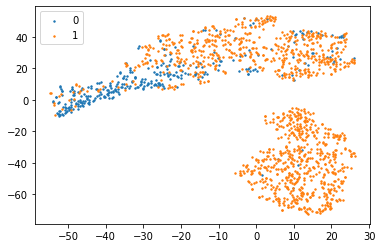

In [55]:
fig, ax = plt.subplots()
group = lidc_TSNE['lobulation']
component_1 = lidc_TSNE['component_1'].to_numpy()
component_2 = lidc_TSNE['component_2'].to_numpy()
# legend = {0:'red', 1:'blue'}

for g in np.unique(group):
    idx = np.where(group == g)
    ax.scatter(component_1[idx], component_2[idx],  label = g, s = 2) #c = legend[g],
ax.legend()
plt.show()

In [59]:
lidc_TSNE.groupby(['lobulation', 'malignancy']).size()

lobulation  malignancy
0           0             309
            1               5
1           0             588
            1             586
dtype: int64

In [60]:
len(lidc_TSNE)

1488

#Cluster Handcrafted features

In [ ]:
%cd ..
from data_utils import 
